In [5]:
import torch
import sys
sys.path.append('../../data_processing')
sys.path.append('../../model')
sys.path.append('../../../data')
import CNN, CNN_multimodal, CNN_LSTM
import TF_data_loader
from torch.utils import data as D
import numpy as np
import pandas as pd
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [6]:
import seaborn as sns
from scipy.cluster import hierarchy

In [7]:
feat_map = torch.load('../../../data/Chipseq_data/FeatMap.pt')
feat_map = {v: k for k, v in feat_map.items()}

In [8]:
index_order = [4, 36, 42, 53, 94, 125, 0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129]

In [9]:
import pandas as pd

df = pd.read_csv('union_matrix_all.csv', header=None)

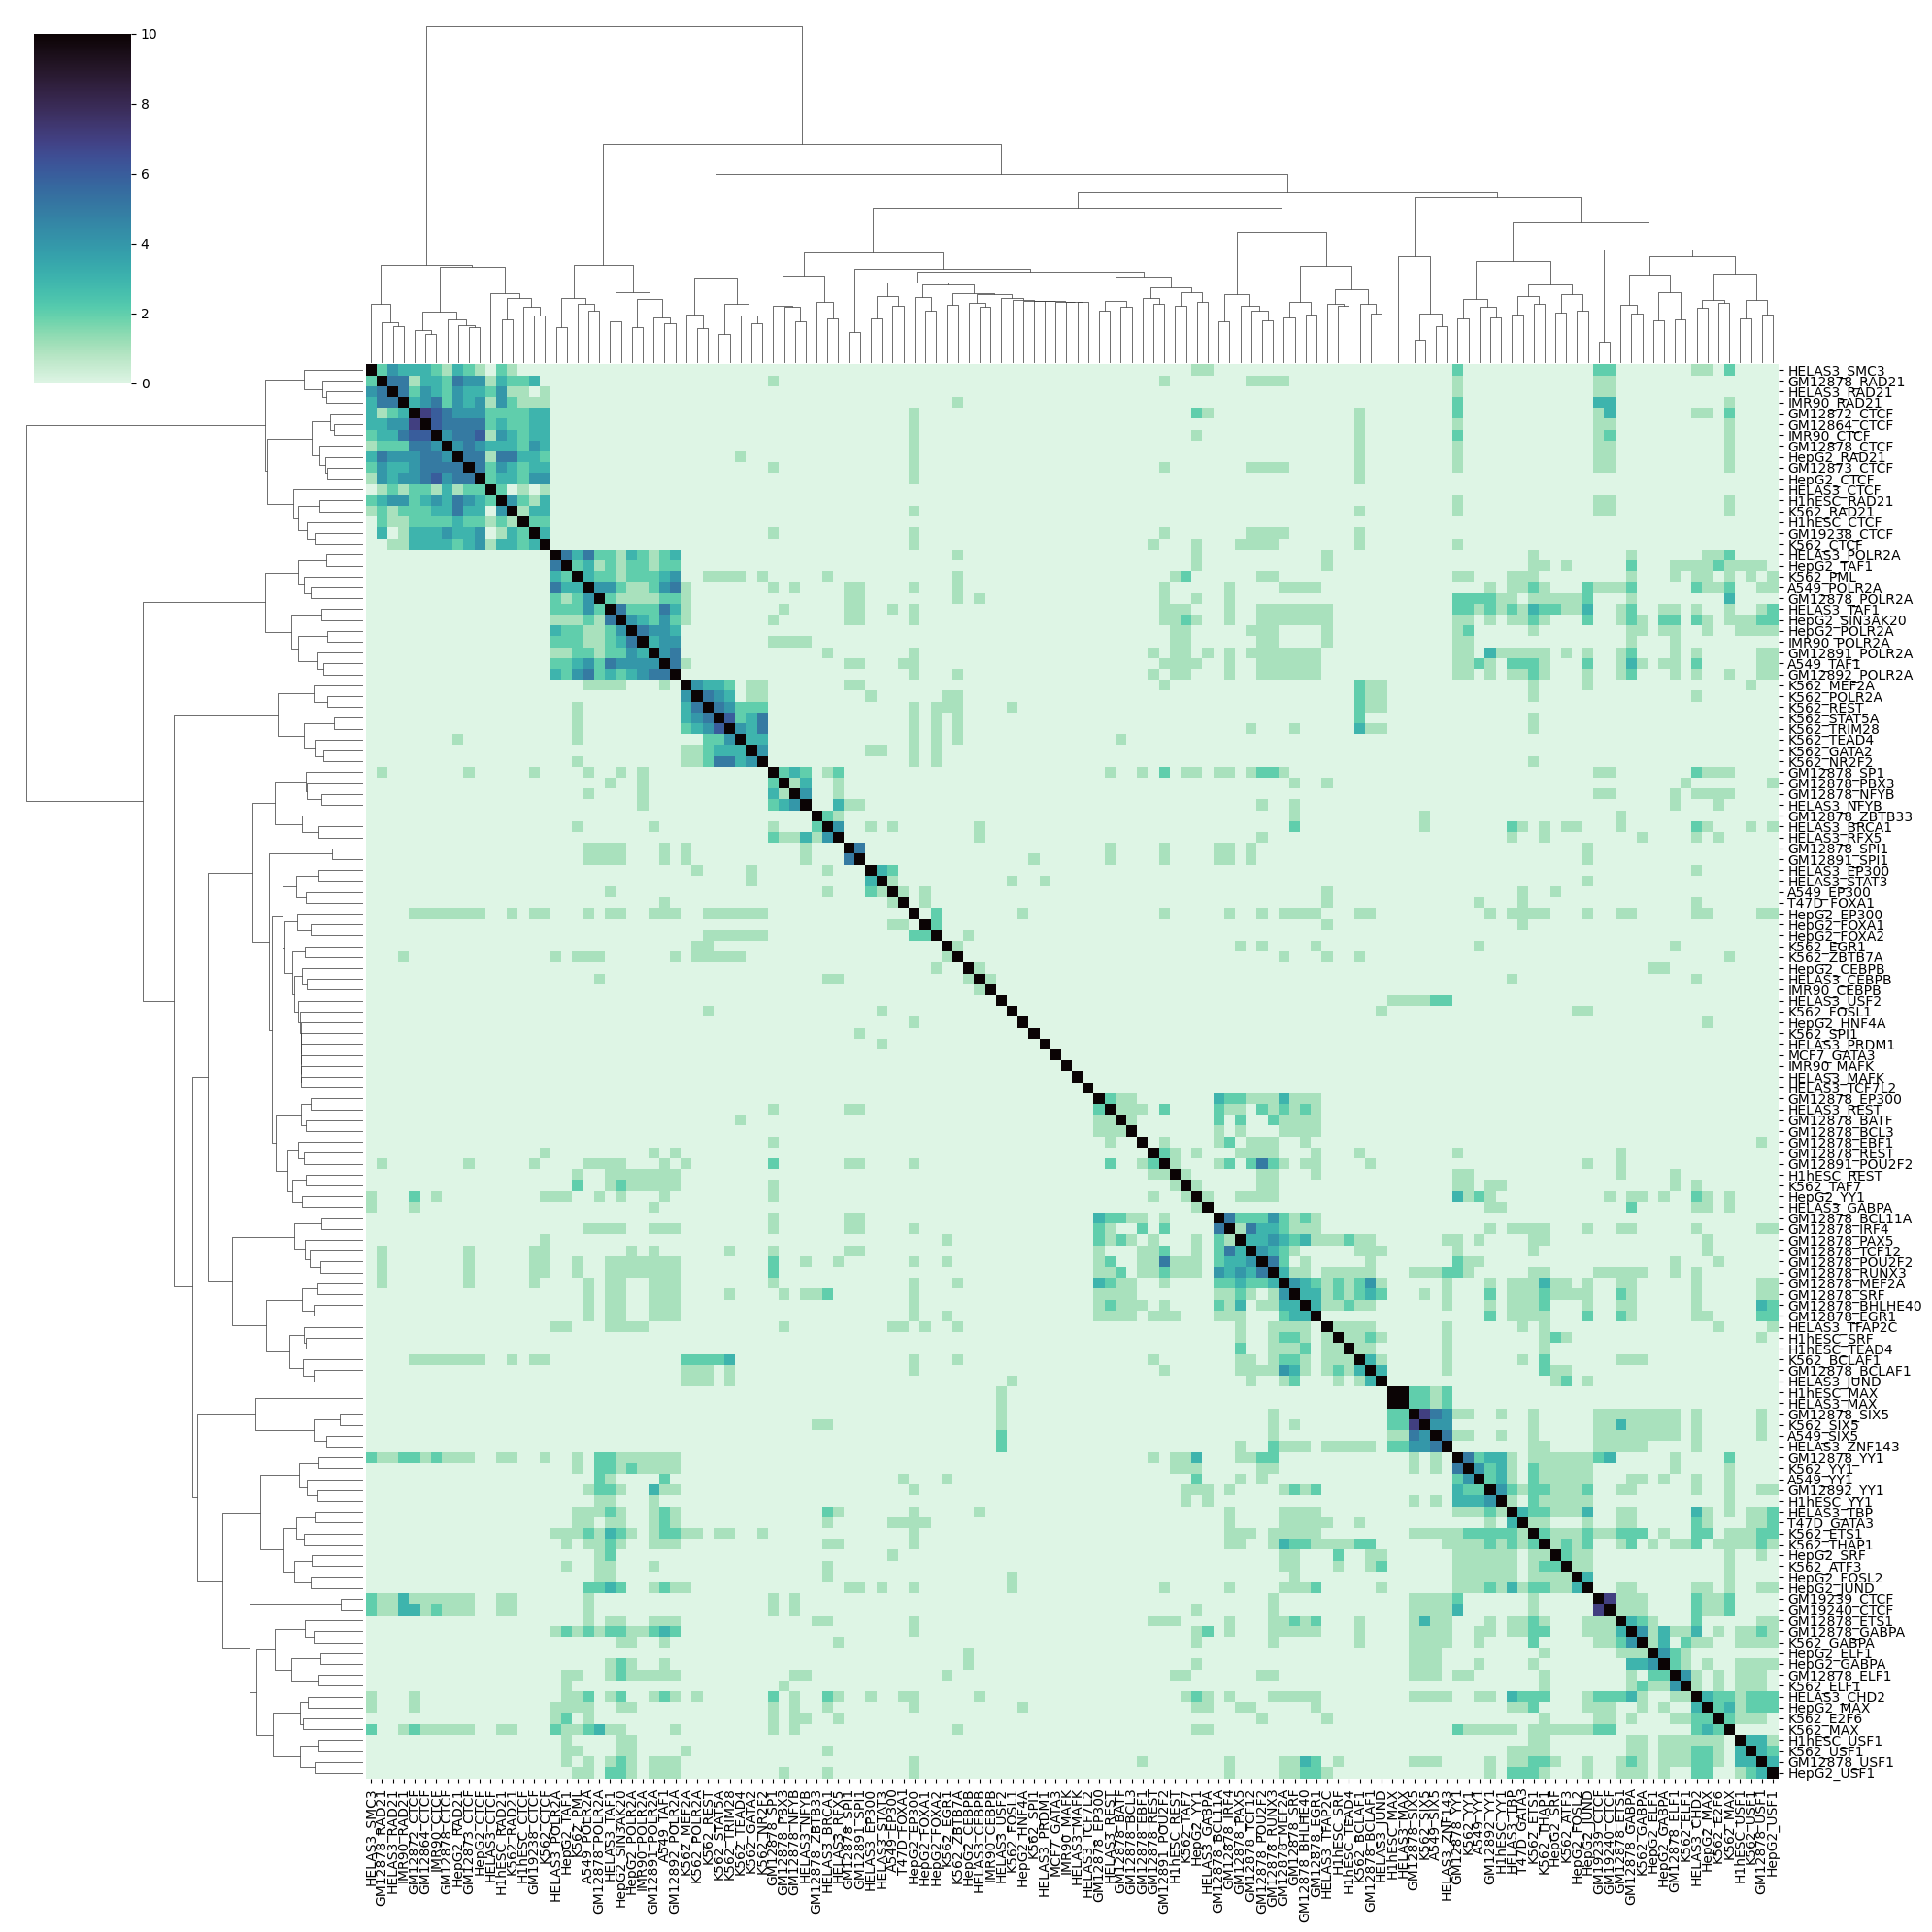

In [10]:
linkage = hierarchy.linkage(df.values, method='ward')
labels = [feat_map[i] for i in index_order]
clustermap_all = sns.clustermap(df, row_linkage=linkage, col_linkage=linkage, xticklabels=labels, yticklabels=labels, figsize = (20, 20), cmap="mako_r", vmin=0, vmax=10)
clustermap_all.savefig("clustermap.png")

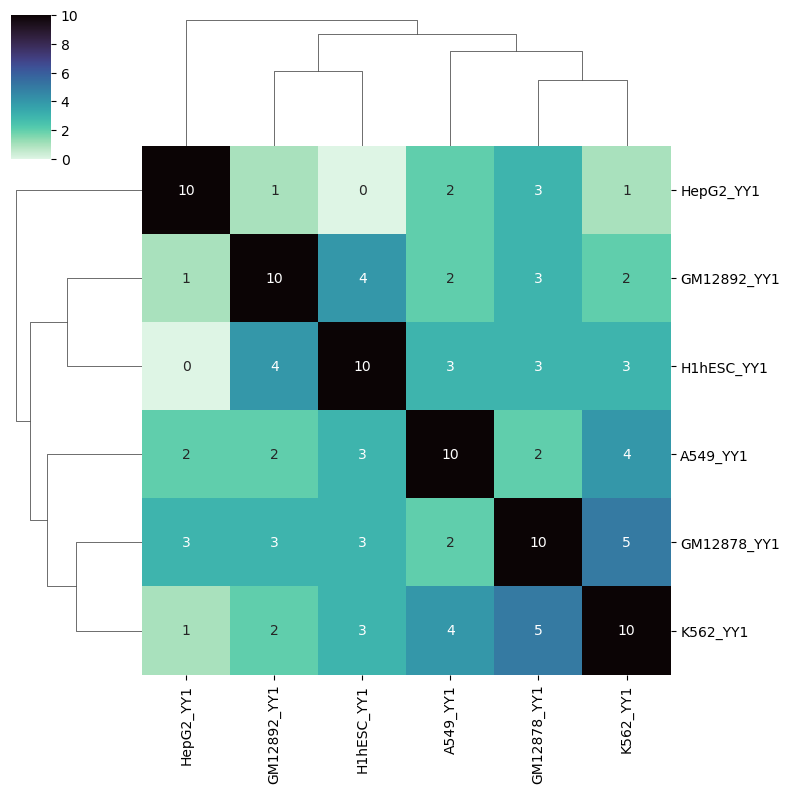

In [11]:
df_YY1 = df.iloc[:6, :6]
YY1_index_order = [4, 36, 42, 53, 94, 125]
linkage = hierarchy.linkage(df_YY1.values, method='ward')
labels = [feat_map[i] for i in YY1_index_order]
clustermap_all = sns.clustermap(df_YY1, row_linkage=linkage, col_linkage=linkage, xticklabels=labels, yticklabels=labels, figsize = (8, 8), cmap="mako_r", annot=True, vmin=0, vmax=10)
clustermap_all.savefig("YY1_clustermap.png")